# M2. Divisibility and primes

We are going to turn our attention the the basics of number theory.
The focus will be on the integers, but we will abstract away the definitons a bit.
Later in the course we are going to learn about polynomials and they have similar structure to the integers from number theoritical point-of-view. There are slight differences that we will highlight, but almost everything will be useable as-is.

In this module we will get familiar with the Extended Euclidean Algorithm (EEA).
This algorithm will be the most important tool in our hand in the journey through discrete models.
The whole course could have been named as Applications of The Extended Euclidean Algortihm.

## M2.1. Basic defintions

We will say that $b$ *divides* $a$, or $a$ is *multiple of* $b$, or $b$ is *divisor of* $a$ if there exists $q$ such that $a=qb$. (Notice that we did not say anything about if $a,b$ and $q$ are integers. But we will assume that they behave like integers.) We will use the notation $b \mid a$. If there is no such $q$, then $b$ is not a divisor of $a$ and we will use notation $b \nmid a$. If we perform Euclidean divison, then $a=qb+r$. If $b$ divides $a$, then this means that the remainder $r=0$.

In Python/Sage, you can check the divisibility relation by checking the remainder: if $a \mid b$, then `a % b == 0` is a `True` expression.

Some properties:
- Since $a0=0$, $a \mid 0$ for all $a$.
- If $0 \mid a$, then $a=0$. This means that only $0 \mid 0$.
- $1 \mid a$ for all $a$.
- If $b \mid a$, then $bc \mid ac$ for all $c$.
- If $bc \mid ac$ and $c=0$, then $b \mid a$.
- If $c \mid a$ and $c \mid b$, then $c \mid \alpha a + \beta b$ for all $\alpha, \beta$.

To be able to illustrate that divisibility can be applied to other structures than the integers, we are going check a pathological, but important example.
In case of the rational numbers, if $a,b \in \mathbb{Q}$, then $a=qb$ with $q = \frac{a}{b}$ if $b \neq 0$.
This means every $0 \neq b \in \mathbb{Q}$ divides all $a \in \mathbb{Q}$.

If $a \mid b$ and $b \mid a$, then we say that $a$ and $b$ are *associated elements*.
The associated elements of $a \in \mathbb{Z}$ are $\pm a$.
Of course, if $0 \neq a,b \in \mathbb{Q}$, then $a$ and $b$ are associated elements.

If $a \mid 1$, then $a$ is a *unit element*. The unit elements of $\mathbb{Z}$ are $\pm 1$.
Since in $\mathbb{Q}$ every nonzero divides every element, every nonzero is a unit element.
If $a$ and $b$ are associated elements, then $a=\varepsilon b$, where $\varepsilon$ is a unit element.

If $0 \neq a = bc$ is only possible if $b$ or $c$ is a unit element (and the other is an associate element of $a$), then $a$ is an *irreducible element*. If an element is not irreducible, then it is a *composite element*. If $0 \neq p$ is not a unit element and $p \mid ab$ implies $p \mid a$ or $p \mid b$, then $p$ is a *prime element*. When we are talkink about posivite integers, we are going to use the the following names: irreducible number, composite number and prime number.

Every prime element is irreducible. The converse is not true in general, but the structures we are studing in this course the converse also holds. In particular, every irredicble element of $\mathbb{Z}$ is also a prime element of $\mathbb{Z}$.

### M2.1.1 Why Prime Numbers are important?

Prime numbers are fundamental in cryptography due to their unique mathematical properties, particularly their role in the difficulty of certain computational problems. In some applications of discrete models like RSA encryption, the security is based on the fact that while multiplying two large prime numbers is computationally simple, factoring their product back into primes is extraordinarily difficult, especially as the primes grow larger. This one-way function (easy to compute but hard to reverse) is essential for encryption and decryption, making it nearly impossible for an attacker to break the encryption without knowing the original primes. This difficulty forms the backbone of many security protocols in real worlds, providing both security and efficiency.

Public key cryptography is uses everywhere, even now when you are reading this module, to make the website secure. In public key cryptography, primes are used within modular arithmetic operations, a topic that we are going to explore in future modules during the course. These systems leverage the properties of primes to create secure keys that are resistant to attacks, such as factorization or solving discrete logarithms, because the operations on prime numbers and their modular results are computationally hard to reverse without the secret key. The security strength of these protocols relies on the assumption that finding large primes and performing operations with them is efficient, while breaking down the encryption (e.g., factorizing large composite numbers) remains infeasible for adversaries.

## M2.2 Fundamental Theorem of Arithmetic (FTA)

Every positive integer can be written as the product of a list of prime numbers and this list is unique (up to order).

The canonical form of $1 < n \in \mathbb{Z}$ is $$n=p_1^{\alpha_1}p_2^{\alpha_2}\cdots p_k^{\alpha_k},$$
where $p_j$ are the prime numbers in FTA and $\alpha_j$ is the *multiplicity* of $p_j$ in the list.
The canonical form of positive integer can be computed with the `factor` function in Sage.

In [7]:
factor(12)

2^2 * 3

We can extend this theorem to all integers. A nonzero integer which is not a unit can be written as a product of irreducible elements.
The list of irreducble elements is unique up to ordering and associativity of the irreducible elements.

We are going to use the following convention. If $0 \neq n \in \mathbb{Z}$ a nonunit element, then we can write $$n=\varepsilon p_1^{\alpha_1}p_2^{\alpha_2}\cdots p_k^{\alpha_k},$$
where $p_j$ are irreducible number, i.e. they are positive, with multiplicity $\alpha_j$ and $\varepsilon$ is a unit element.

In Sage, if `factor` is called with negative, nonunit integer, then it returns this canonical form we have descibed.

In [2]:
factor(-12)

-1 * 2^2 * 3

You can extract the unit and list of irreducibles and their exponent:

In [10]:
fs = factor(-12)
print(fs.unit())
print(list(fs))

-1
[(2, 2), (3, 1)]


We can also access the individual primes and their exponent:

In [11]:
fs = factor(12)
fs[1]

(3, 1)

It is also possible to iterate through them:

In [5]:
for p, e in factor(-12):
    print(p, e)

2 2
3 1


### M2.2.1. Getting familiar with `factor` in Sage

We can use the canonical form of positive integers to enumerate or count the number of divisors.
Let us work through an example. The canonical form of $28$:

In [17]:
factor(28)

2^2 * 7

The list of divisors is $1, 2, 4, 7, 14, 28$. So there are $6$ divisors. Let us check the canonical form of the divisors:

In [19]:
for divisor in [1, 2, 4, 7, 14, 28]:
    print(f'{divisor} = {factor(divisor)}')

1 = 1
2 = 2
4 = 2^2
7 = 7
14 = 2 * 7
28 = 2^2 * 7


We can see that we can write every divisor of $28$ as the product of prime numbers in the canonical form of $28$:
- $1 = 2^{0}7^{0}$
- $2 = 2^{1}7^{0}$
- $4 = 2^{2}7^{0}$
- $7 = 2^{0}7^{1}$
- $14 = 2^{1}7^{1}$
- $28 = 2^{2}7^{1}$

The exponents of a specific prime base are between $0$ and the original exponent in $28$'s canonical form.

So every $2^{a}7^{b}$ divides $28$ with $a=0,1,2$ and $b=0,1$ and there are $(2+1)(1+1)=6$ divisors.

Complete the following two functions in Sage. You can assume that the argument is a positive integer. (From the tests, you can see that Sage has already builtin functions for these procedures.)

In [0]:
def number_of_divisors(n: Integer) -> Integer:
    return 0

for n in range(1, 100):
    assert number_of_divisors(n) == sigma(n, 0)
print('Tests passed')

In [0]:
def get_divisors(n: Integer) -> list[Integer]:
    return []

for n in range(1, 100):
    assert sorted(get_divisors(n)) == divisors(n)

print('Tests passed')

## M2.3. Distribution of prime numbers

There are infinitly many prime numbers. If there were finitly many and we would multiply them and add one, then the result would not be divisbible by any prime number, since the remainder of Euclidean divison would be one. This means that the Fundemantel Theorem of Arithmetic does not hold. This is a contradiction and the assumption that there finite number of prime numbers must be wrong.

Let $n$ be the product of prime numbers up until a specific prime $p$.
The numbers $n+2, n+3, \ldots n+p$ are all composite. (Why?)
So we have seen $p-1$ number of consequitve composite numbers.
There are infinitly many prime numbers, so the value of $p$ is unbounded.
Therefore we can find any number of consequtive composite numbers.
The gap between two primes numbers can get arbitary large.

Can the gap be as small as possible between two consequtive prime numbers?
Since all primes but $2$ is an odd number, the smallest gap possible is two.
If the pair $p$ and $p+2$ are both prime numbers, then they are called *twin primes*.
The question of whether there exist infinitely many twin primes has been one of the great open questions in number theory for many years.

In Sage we can use the function `prime_pi(n)` to get the number of prime numbers up to a specific number `n`, which calculates the value $$\pi(n) = \lvert \left\{ 2 \le p \le n : p\ \text{is a prime number}\right\} \rvert.$$

In [22]:
prime_pi(100)

25

To list all prime numbers below a given $n$ integer, we can use sieve of Eratosthenes: list all numbers between $2$ and $n$.
The first number $2$ is a prime, so cross out all multiples of two in the list.
The next number in the current list is $3$ which is a prime number, so again remove all multiples of $3$ from the list.
We can continue this process, until all that is left are the prime numbers up until $n$.

Implement sieve of Eratosthenes below. (Again, you can see in the test that Sage already has a function for this process: `primes(n)`.)

In [0]:
def sieve_of_eratosthenes(n: Integer) -> list[Integer]:
    return []

assert sieve_of_eratosthenes(20) == list(primes(20))
print('Test passed')

The problem with this method is that it requires much memory for large $n$.
Improve the function above so that you only check odd integers.

In [0]:
def sieve_of_eratosthenes_odd_only(n: Integer) -> list[Integer]:
    return []

assert sieve_of_eratosthenes_odd_only(20) == list(primes(20))
print('Test passed')

**NOTE: This excersie below is optional. You can skip it and come back when you finished with the rest.**

You can skip all elements that is divisible by $2,3$ and $5$. To achieve this, you can store the numbers in the form of $30i + m_j$ where $1 \le i \le \lceil n / 30 \rceil$ and $m = (1,7,11,13,17,19,23,29)$ and $0 \le j < 8$.

In [0]:
def sieve_of_eratosthenes_extra(n: Integer) -> list[Integer]:
    return []

assert sieve_of_eratosthenes_extra(20) == list(primes(20))
print('Test passed')

To be able to calculate $\pi(n)$ we need to list all prime numbers up to $n$, which might not be feasible for large $n$.
The Prime Number Theorem tells us that we can approximate this number by $$\pi(n) \approx \frac{n}{\log n}.$$

The following plot tries to illustrate how good the approximation is.

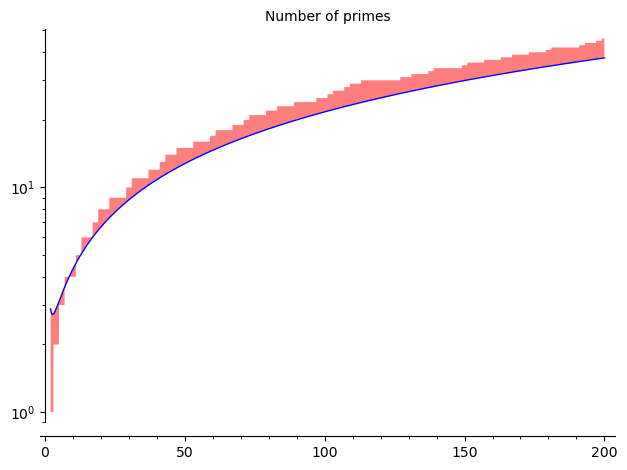

In [29]:
plot(x/log(x), (2, 200), scale='semilogy', fill=lambda x: prime_pi(x),fillcolor='red', title='Number of primes')


## M2.4. Greatest common divisor

A *greatest common divisor (GCD)* of $a_1,\ldots,a_n$ elements is $d$ if 
- $d \mid a_i$ for all $i=1,\ldots,n$, i.e. $d$ is a common divisor,
- if another $d'$ is a common divisor, then $d' \mid d$, i.e. $d$ is maximal with respect to divisibility.

Notice that this definition does not use the usual ordering, so it will work in structures where there is no ordering, e.g. polynomials.
However this definition does not make the GCD of the numbers unique.
If $d$ is a greatest common divisor, then every associative elements of $d$ are also greatest common divisors.
In case of integers, we will always pick the nonnegative divisor from $\pm d$.
We will use the notation $\mathrm{gcd}\left(a_1,\ldots,a_n\right)=d$.

We will say that the elements $a_1,a_2,\ldots,a_n$ are *coprime* if their $1$ is their GCD.

We will say that $b$ is a *least common multiple (LCM)* of $a_1,\ldots,a_n$ elements if
- $a_i \mid b$ for all $i=1,\ldots,n$, i.e. $b$ is a common multiple,
- if another $b'$ is a common multiple, then $b \mid b'$, i.e. $d$ is minimal with respect to divisibility.
Again, this is not unique and every associative element of $b$ is also a least common multiple.
In case of integers, we will pick the nonnegative.

We can use the canonical form of the to compute GCD and LCM.
Let us assume that $a=p_1^{\alpha_1} \cdots p_k^{\alpha_k}$ and $b=p_1^{\beta_1} \cdots p_k^{\beta_k}$ in an extended sense, i.e. we allow the exponents to be zero, so the primes are the same. In this case $$\mathrm{gcd}(a,b)=p_1^{\min\left(\alpha_1, \beta_1\right)} \cdots p_k^{\min\left(\alpha_k, \beta_k\right)}$$ and $$\mathrm{lcm}(a,b)=p_1^{\max\left(\alpha_1, \beta_1\right)} \cdots p_k^{\max\left(\alpha_k, \beta_k\right)}.$$
For e.g. $12=2^{2}3^{1}5^{0}$ and $40=2^{3}3^{0}5^{1}$ and $$\mathrm{gcd}(12, 40)=2^{2}3^{0}5^{0}=4$$ and $$\mathrm{lcm}(12, 40)=2^{3}3^{1}5^{1}=120.$$

Complete the Sage functions below that calculate GCD and LCM via the factorization of the arguments.

In [0]:
def gcd_via_factors(a : Integer, b : Integer) -> Integer:
    return 1

for a in range(2, 100):
    for b in range(2, 100):
        assert gcd_via_factors(a, b) == gcd(a, b)
print('Tests passed')

In [0]:
def lcm_via_factors(a : Integer, b : Integer) -> Integer:
    return 1

for a in range(2, 100):
    for b in range(2, 100):
        assert lcm_via_factors(a, b) == lcm(a, b)
print('Tests passed')

### M2.4.1. Euclidean algorithm

Factorization algorithms can be quite slow. (This is the reason why some cryptography algorithms work.)
There is a better algorithm for calculating GCD.

We will use the following propreties of GCD:
1. $\mathrm{gcd}(a, 0) = a$, more specifically $\mathrm{gcd}(0, 0) = 0$.
2. $\mathrm{gcd}(a, b) = \mathrm{gcd}(b, a)$.
3. $\mathrm{gcd}(a, b) = \mathrm{gcd}(a-b, b)$. This implies $\mathrm{gcd}(a, b) = \mathrm{gcd}(a-qb, b)$ for any $q$. Specifically $\mathrm{gcd}(a, b) = \mathrm{gcd}(a \bmod b, b)$.

Let us define the recurrence relation $r_0 = a$, $r_1 = b$ and $r_{n+2} = r_n \bmod r_{n+1}$ for all $n \ge 0$ integer.
From Property 3 and 4 we can deduce that $$\mathrm{gcd}(a,b)=\mathrm{gcd}(r_n, r_{n+1})$$ for all $n\ge 0$.
Let us assume that $a$ and $b$ are nonnegative. (We can always change the signs, it won't affect the GCD.)
The sequence $r_n$ is decreasing. (Why?) Also it is bounded below by $0$.
This means that there is an index $N$ for which $r_{N} > 0$ and $r_{N+1}=0$.
Since $\mathrm{gcd}(a,b)=\mathrm{gcd}(r_N, r_{N+1}) = \mathrm{gcd}(r_N, 0) = r_N$, if we compute the remainder recursively the last non-zero value of the sequence is the greatest common divisor of the arguments.

Write a recursive Sage function which calculates the GCD of its nonnegative integer arguments.

Hint: You might need to swap the arguments when doing the recusive call.

In [0]:
def recursive_gcd(a: Integer, b: Integer) -> Integer:
    return 0

for a in range(100):
    for b in range(100):
        assert recursive_gcd(a, b) == gcd(a, b)

print('Tests passed')

Now try to create a non-recursive function which applies the same computation.

In [0]:
def non_recursive_gcd(a: Integer, b: Integer) -> Integer:
    return 0

for a in range(100):
    for b in range(100):
        assert non_recursive_gcd(a, b) == gcd(a, b)

print('Tests passed')

Finally we are ready to introduce the most important algorithm of this module (and probably the whole course).
We are going to extend the previous algorithm, which is called Euclidean algorithm to compute some additional values besides the GCD of its arguments..
We are going to call it Extended Euclidean Algorithm. (Duh!)

It will return additional elements $x,y$ besides the GCD $d$ such that $ax+by=d$, where $a$ and $b$ are the arguments of the function call.
To be able to do this, we are going to always maintain the condition $r_n = ax_b + by_n$. For $n=0,1$ it is easy to maintain: let $x_0=1, y_0=0$ and $x_1=0, y_1=1$.

Since $r_{n+2} = r_n \bmod r_{n+1}$, i.e. $$r_{n+2} = r_n -qr_{n+1},$$
where $q$ is the quotient of the Euclidean divison.
We know that $r_n = ax_n + by_n$ and $r_{n+1} = ax_{n+1} + by_{n+1}$ so $$r_{n+2} = (ax_n + by_n) -qax_{n+1} + by_{n+1}$$
which can be rearranged into $$r_{n+2} = a(x_n - qx_{n+1}) + b(y_n - qy_{n+1}).$$
From this we can see that from $x_n$ and $x_{n+1}$ we can compute $$x_{n+2} = x_n - qx_{n+1}$$ and from $y_n$ and $y_{n+1}$ we can compute $$y_{n+2} = y_n - qy_{n+1}.$$

Extend the non-recursive version of GCD calculation into the Extended Euclidean Algorithm.

Note: Sage has builtin version for these algorithms. They are called `gcd` and `xgcd`.

In [0]:
def extended_euclidean_algorithm(a: Integer, b: Integer) -> (Integer, Integer, Integer):
    return 0, 0, 0

for a in range(100):
    for b in range(100):
        d, x, y = extended_euclidean_algorithm(a, b)
        assert d == gcd(a, b)
        assert d == a*x + b*y

print('Tests passed')